# Unsupervised Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**Team RR-1#MLTech**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EA - Movies Recommender Systems

The objective is to construct a recommender system that employs content or collaborative filtering approaches to accurately forecast a user's rating for a movie they haven't watched, leveraging their past preferences. The aim is to develop a robust and effective solution that holds substantial economic potential, as it enables users to discover and engage with content aligned with their interests, ultimately driving revenue and fostering loyalty to the platform

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Data Dependencies</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Preprocessing</a>

<a href=#five>5. Feature Engineering</a>

<a href=#six>6. Model and Model Evaluation</a>


<a id="one"></a>

# Importing Data Dependences

In [1]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>

# Loading the Data

**Loading the train set**

In [2]:
# Specify the path to the zip file
zip_file = 'data.zip'

with zipfile.ZipFile(zip_file, mode="r") as archive:
    archive.printdir()

File Name                                             Modified             Size
imdb_data.csv                                  2022-10-04 09:50:24      5039246
movies.csv                                     2022-10-04 09:50:24      3038099
sample_submission.csv                          2022-10-04 09:50:24     76828669
tags.csv                                       2022-10-04 09:50:30     38810332
test.csv                                       2022-10-04 09:50:32     56828598
train.csv                                      2022-10-04 09:50:36    261306836


In [3]:
# # open zipped dataset
with zipfile.ZipFile("data.zip") as z:
   # open the csv file in the dataset
   with z.open("train.csv") as f:
        # read the dataset
        train = pd.read_csv(f)

In [4]:
# to work on kaggle cloud server load the data without reference to the zipfolder

# train = pd.read_csv('../input/data-file/train.csv')

**Loading the test set**

In [5]:
with zipfile.ZipFile("data.zip") as test_file:
   # open the csv file in the dataset
   with test_file.open("test.csv") as test_csv:
        # read the dataset
        test = pd.read_csv(test_csv)

In [6]:
# test = pd.read_csv('../input//data-file/test.csv')

**Loading the movie set**

In [7]:
with zipfile.ZipFile("data.zip") as movie_file:
   # open the csv file in the dataset
   with movie_file.open("movies.csv") as movie_csv:
        # read the dataset
        movies = pd.read_csv(movie_csv)

In [8]:
# movies = pd.read_csv('../input//data-file/movies.csv')

**imdb**

In [9]:
with zipfile.ZipFile("data.zip") as imdb_file:
   # open the csv file in the dataset
   with imdb_file.open("imdb_data.csv") as imdb_csv:
        # read the dataset
        imdb = pd.read_csv(imdb_csv)

In [10]:
# imdb = pd.read_csv('../input//data-file/imdb_data.csv')

<a id="three"></a>

# Exploratory Data Analysis

The bulk of the exploratory data analysis was performed on a seperate notebook but for the purpose of the model we're going tp build, lets explore our data

### Training Data

In [11]:
# lets look at the head of our data set

In [12]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [13]:
train.rating.unique() # to check the unique ratings in the data

array([4. , 4.5, 5. , 2. , 3. , 1. , 3.5, 2.5, 0.5, 1.5])

In [14]:
# get the info of our columns

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [15]:
# checking for null values

train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [16]:
# check the length of olumns and rows

print(f'Total number of rows is {train.shape[0]}')
print(f'Total number of rows is {train.shape[1]}')

Total number of rows is 10000038
Total number of rows is 4


In [17]:
train.describe() # Get the statistical summary of the rating column

,userId,movieId,rating,timestamp
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.533395e+00,1.215677e+09
std,4.679359e+04,3.919578e+04,1.061124e+00,2.268921e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.197000e+03,3.000000e+00,1.011742e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199019e+09
75%,1.215790e+05,8.630000e+03,4.000000e+00,1.447242e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


### Test data

In [18]:
test.head() # view the first 5 rows

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [19]:
test.info() # get the info of the type of data in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [20]:
test.isnull().sum() # number of missing values

userId     0
movieId    0
dtype: int64

In [21]:
# The total number of rows and columns in the data set

print(f'Total number of rows is {test.shape[0]}')
print(f'Total number of columns {test.shape[1]}')

Total number of rows is 5000019
Total number of columns 2


### Movies data

In [22]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [24]:
# check for null values in the movies df

movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [25]:
print(f'Total number of columns is {movies.shape[1]}')
print(f'Total number of rows is {movies.shape[0]}')

Total number of columns is 3
Total number of rows is 62423


### imdb data

In [26]:
imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [27]:
# get the information about the data in each columns

imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [28]:
# check for null values

imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [29]:
# create a merge for the train and the movie set to make some visuals

df = pd.merge(train, movies, how = 'inner')

In [30]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [31]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())  # make a data frame with the groupby obj

ratings.head()

,rating
title,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000
"""Great Performances"" Cats (1998)",2.753731
#1 Cheerleader Camp (2010),1.900000
#Female Pleasure (2018),4.000000
#FollowMe (2019),2.400000


Text(0.5, 1.0, 'Average Ratings Distribution')

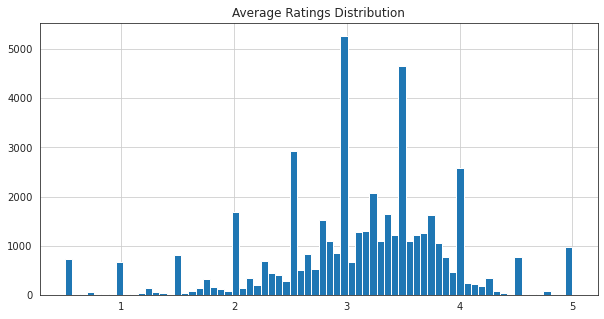

In [32]:
# View the distribution of the histogram

plt.figure(figsize=(10,5))
ratings['rating'].hist(bins = 70)
plt.title('Average Ratings Distribution')

In [33]:
genre_df = pd.DataFrame(df.groupby('genres')['rating'].count().sort_values(ascending = False)) # create the genre data frame containing the genre

genre_df = genre_df.reset_index()

genre_df.head()

,genres,rating
0,Drama,706335
1,Comedy,606057
2,Comedy|Romance,360826
3,Drama|Romance,318408
4,Comedy|Drama,288847


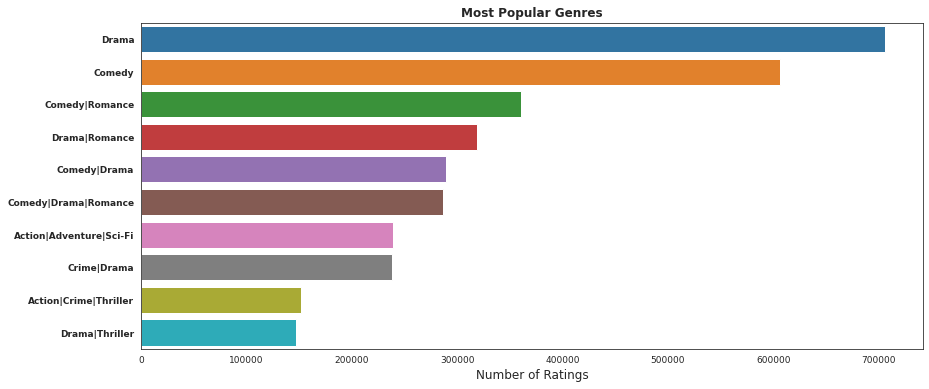

In [34]:
# Top 10 Genres

plt.figure(figsize=(14, 6))
sns.barplot(data = genre_df.head(10), x = 'rating', y = 'genres', orient = 'h')
plt.title('Most Popular Genres', weight = 'bold')
plt.xlabel('Number of Ratings', fontsize = 12)
plt.ylabel('')
plt.yticks(fontsize = 9, weight = 'bold')
plt.xticks(fontsize = 9)
plt.savefig('Mostgenre.png', transparent = False, dpi=300)

In [35]:
# get a dataframe grouped by title

title_df = pd.DataFrame(df.groupby('title')['rating'].count().sort_values(ascending = False))

title_df = title_df.reset_index()
title_df.head()

,title,rating
0,"Shawshank Redemption, The (1994)",32831
1,Forrest Gump (1994),32383
2,Pulp Fiction (1994),31697
3,"Silence of the Lambs, The (1991)",29444
4,"Matrix, The (1999)",29014


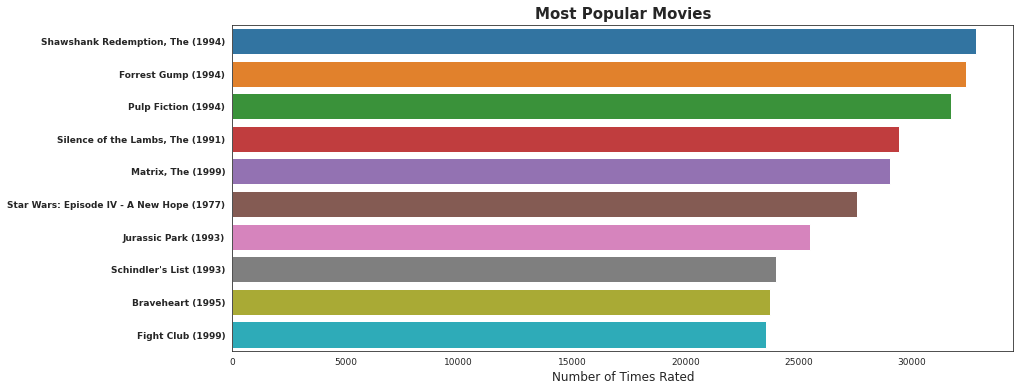

In [36]:
# the top 10 watched movie

plt.figure(figsize=(14, 6))
sns.barplot(data = title_df.head(10), x = 'rating', y = 'title')
plt.title('Most Popular Movies', fontsize = 15, weight = 'bold')
plt.xlabel('Number of Times Rated', fontsize = 12)
plt.ylabel('')
plt.yticks(fontsize = 9, weight = 'bold')
plt.xticks(fontsize = 9)
plt.savefig('MostPopularMovie.png', transparent = False, dpi=300)

<a id="four"></a>

# Preprocessing

**Merge the train data and the movie data**

In [37]:
# merge the dataframes using the pandas merge function

df = pd.merge(df, imdb, how = 'inner', on = 'movieId')

In [38]:
df.head()

,userId,movieId,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman


In [39]:
df.duplicated().sum()

0

In [40]:
# join all the meta data of the movies together

df['tags'] = df.title + ' ' +  df.genres + ' ' + df.title_cast + ' ' + df.title_cast + ' ' + df.director + ' ' + df.plot_keywords

In [41]:
# rename columns to following right naming convention

df = df.rename(columns = {'userId':'user_id','movieId': 'movie_id'})

In [42]:
df.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'title', 'genres',
       'title_cast', 'director', 'runtime', 'budget', 'plot_keywords', 'tags'],
      dtype='object')

In [43]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,tags
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008) Comedy|Crime|Drama|Thriller E...
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008) Comedy|Crime|Drama|Thriller E...
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008) Comedy|Crime|Drama|Thriller E...
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008) Comedy|Crime|Drama|Thriller E...
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008) Comedy|Crime|Drama|Thriller E...


In [44]:
df.tags = df.tags.str.replace('|', ' ')

In [45]:
df.tags[0]

'In Bruges (2008) Comedy Crime Drama Thriller Elizabeth Berrington Rudy Blomme Olivier Bonjour Mark Donovan Ann Elsley Colin Farrell Jean-Marc Favorin Ralph Fiennes Brendan Gleeson Eric Godon Zeljko Ivanek Sachi Kimura Anna Madeley Louis Nummy Clémence Poésy Elizabeth Berrington Rudy Blomme Olivier Bonjour Mark Donovan Ann Elsley Colin Farrell Jean-Marc Favorin Ralph Fiennes Brendan Gleeson Eric Godon Zeljko Ivanek Sachi Kimura Anna Madeley Louis Nummy Clémence Poésy Martin McDonagh dwarf bruges irish hitman'

In [46]:
df.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'title', 'genres',
       'title_cast', 'director', 'runtime', 'budget', 'plot_keywords', 'tags'],
      dtype='object')

In [47]:
# remove all leading and trailing spaces in the tags columns

df.tags = df.tags.str.strip()

In [48]:
# with pd.option_context('display.max_colwidth', None):
#   display(df.head())

**Lets look at the total number of users and the total number of movies**

In [49]:
num_users = df['user_id'].nunique()

num_movies = df['movie_id'].nunique()

print(f'Number of users in the data set is {num_users}')
print(f'Number of movies in the data set is {num_movies}')

Number of users in the data set is 162522
Number of movies in the data set is 23544


In [50]:
df.head()

,user_id,movie_id,rating,timestamp,title,genres,title_cast,director,runtime,budget,plot_keywords,tags
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008) Comedy Crime Drama Thriller E...
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008) Comedy Crime Drama Thriller E...
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008) Comedy Crime Drama Thriller E...
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008) Comedy Crime Drama Thriller E...
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...,Martin McDonagh,107.0,"$15,000,000",dwarf|bruges|irish|hitman,In Bruges (2008) Comedy Crime Drama Thriller E...


<a id="five"></a>

# Feature Engineering

In [51]:
!pip install scikit-surprise

In [52]:
# import dependencies for feature engineering and model building
import surprise
from surprise import Dataset, Reader, SVD
from surprise import accuracy # Evaluate the model using appropriate metrics (e.g., RMSE)

In [53]:
%%time

# Create a Surprise Dataset object object for the svd model
from surprise import Dataset
from surprise.model_selection import train_test_split
# create a scale of 0 to 5 because we fraction less than 1 in the dataset
unique_ratings = (0.5, 5) 

reader = Reader(rating_scale = unique_ratings)
dataset = Dataset.load_from_df(df[['user_id', 'movie_id', 'rating']], reader)

# Split the dataset into training and testing sets
trainset, validationset = train_test_split(dataset, test_size=0.2, random_state=42)

CPU times: user 29.1 s, sys: 1.97 s, total: 31 s
Wall time: 31 s


<!-- Section 1: Importing Packages -->
<a id="six"></a>

# Model and Model Evaluation

### First Model

Collaborative filtering using Singular Value Decomposition

In [54]:
# Initialize the model

model = SVD(verbose = True, random_state = 50, lr_all = 0.002, biased = True)

In [55]:
%%time

# Train the model 

model.fit(trainset) # train the model

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
CPU times: user 1min 54s, sys: 17 ms, total: 1min 54s
Wall time: 1min 54s


In [56]:
prediction = model.test(validationset)  # make prediction to evaluate the model

In [57]:
# Evaluate the model

rmse_value = accuracy.rmse(prediction)

RMSE: 0.8604


In [58]:
%%time

# Retrain the model
model = SVD(verbose = True, n_factors=300, random_state = 100)

# train the with full train data
model.fit(dataset.build_full_trainset())

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
CPU times: user 4min 9s, sys: 607 ms, total: 4min 10s
Wall time: 4min 10s


### Model Evaluation with RMSE

In [59]:
prediction_2 = model.test(validationset)  # make prediction to evaluate the model

In [60]:
rmse_2 = accuracy.rmse(prediction_2)

RMSE: 0.5596


In [61]:
# lets define a function to calculate the r2 value

def calculate_r2(predictions):
    actual_ratings = np.array([pred.r_ui for pred in predictions])
    predicted_ratings = np.array([pred.est for pred in predictions])
    mean_rating = np.mean(actual_ratings)
    total_variance = np.sum((actual_ratings - mean_rating) ** 2)
    residual_variance = np.sum((actual_ratings - predicted_ratings) ** 2)
    r2 = 1 - (residual_variance / total_variance)
    return round((r2), 4)

In [62]:
rsquared = calculate_r2(prediction_2)
print(f'Rsquared Error is {rsquared}')

Rsquared Error is 0.7215


In [63]:
# lets check the ratings for a user with a userid and movieid

def surprise_get_movie_rating(user_id, movie_id):
    # Check if the user ID exists in the data
    if user_id not in df['user_id'].unique():
        print(f"User ID {user_id} not found in the data.")
        return

    # Check if the movie ID exists in the data
    if movie_id not in df['movie_id'].unique():
        print(f"Movie ID {movie_id} not found in the data.")
        return

    # Get the predicted rating for the user and movie from the trained model
    predicted_rating = model.predict(user_id, movie_id).est

    return print(f"User {user_id} rated movie {movie_id} have a predicted rating: {predicted_rating:.2f}")


In [66]:
surprise_get_movie_rating(90, 90)

User 90 rated movie 90 have a predicted rating: 3.71


In [75]:
def surprise_get_movie_rating(user_id, movie_title):
    '''This function takes a movie, and the a user id 
       and makes predictions based on similar user and movie details
    '''
    # Check if the user ID exists in the data
    if user_id not in df['user_id'].unique():
        print(f"User ID {user_id} not found in the data.")
        return

    # Check if the movie title exists in the data
    if movie_title not in df['title'].unique():
        print(f"Movie '{movie_title}' not found in the data.")
        return

    # Get the movie ID corresponding to the movie title
    movie_id = df[df['title'] == movie_title]['movie_id'].iloc[0]

    # Get the predicted rating for the user and movie from the trained model
    predicted_rating = model.predict(user_id, movie_id).est

    print(f"User with {user_id} and movie '{movie_title}' has a predicted rating: {predicted_rating:.2f}")


In [77]:
user_id = 9  # Replace with the desired user ID
movie_title = "Toy Story (1995)"  # Replace with the desired movie title
surprise_get_movie_rating(user_id, movie_title)

User with 9 and movie 'Toy Story (1995)' has a predicted rating: 4.14


In [83]:
# create a function to generate recommendations as follows

def get_top_n_recommendations(user_id, movie_title, n):
    # Check if the user ID exists in the data
    if user_id not in df['user_id'].unique():
        print(f"User ID {user_id} not found in the data.")
        return

    # Check if the movie title exists in the data
    if movie_title not in df['title'].unique():
        print(f"Movie title '{movie_title}' not found in the data.")
        return

    # Get the movie ID corresponding to the given title
    movie_id = df[df['title'] == movie_title]['movie_id'].iloc[0]

    # Retrieve a list of all movie IDs
    all_movie_ids = df['movie_id'].unique()

    # Filter out movies already rated by the user
    user_movies = df[df['user_id'] == user_id]['movie_id']
    unrated_movies = list(set(all_movie_ids) - set(user_movies))

    # Predict ratings for unrated movies
    unrated_predictions = [model.predict(user_id, movie_id) for movie_id in unrated_movies]

    # Sort predictions by estimated rating in descending order
    top_n_predictions = sorted(unrated_predictions, key=lambda x: x.est, reverse=True)[:n]

    # Get movie IDs for the top recommendations
    top_n_movie_ids = [prediction.iid for prediction in top_n_predictions]

    # Get movie titles for the top recommendations
    top_n_movies = df[df['movie_id'].isin(top_n_movie_ids)]['title'].unique()

    # Print the top recommendations
    print(f"Top {n} recommendations for user {user_id} based on movie '{movie_title}':")
    for i, movie_title in enumerate(top_n_movies, 1):
        print(f"{i}. {movie_title}")

In [85]:
get_top_n_recommendations(7, "Toy Story (1995)", 10)

Top 10 recommendations for user 7 based on movie 'Toy Story (1995)':
1. It's a Wonderful Life (1946)
2. Dead Man (1995)
3. Princess Mononoke (Mononoke-hime) (1997)
4. Lives of Others, The (Das leben der Anderen) (2006)
5. 12 Angry Men (1957)
6. Gone with the Wind (1939)
7. Celebration, The (Festen) (1998)
8. Dersu Uzala (1975)
9. Red Beard (Akahige) (1965)
10. 56 Up (2012)


### Collaborative Filtering using Matrix Factorization - Memory based

In [86]:
fact_matrix_df = df[['user_id', 'movie_id', 'rating']]
fact_matrix_df.head()

,user_id,movie_id,rating
0,5163,57669,4.0
1,87388,57669,3.5
2,137050,57669,4.0
3,120490,57669,4.5
4,50616,57669,4.5


In [87]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(fact_matrix_df, test_size=0.25) # lets train the model using 80% of the data

In [88]:
n_users = df.user_id.nunique() # get the number users
n_movies = df.movie_id.nunique() # get the number of movies

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+str(n_movies))

Num. of Users: 162522
Num of Movies: 23544


In [90]:
# # Calulate the sparcity of the data

sparsity=round(1.0-len(df)/float(n_users*n_movies),3)
print('The sparsity level of Data is ' +  str(sparsity*100) + '%')
print(f'With sparsity this high, the data is largely filled with zeros')

The sparsity level of Data is 99.7%
With sparsity this high, the data is largely filled with zeros


In [91]:
train_data.shape

(7224773, 3)

In [92]:
val_data.shape

(2408258, 3)

In [97]:
from scipy.sparse import coo_matrix
import dask.array as da

In [98]:
# Get the max movie and user indexes
max_user_index = max(train_data['user_id'].max(), val_data['user_id'].max())
max_movie_index = max(train_data['movie_id'].max(), val_data['movie_id'].max())

print(f'Maximum user index is: {max_user_index}')
print(f'Maxiimum movie index is: {max_movie_index}')

# # create the user matrix for both the train and test data
# train_data_matrix = np.zeros((max_user_index, max_movie_index))
# test_data_matrix = np.zeros((max_user_index, max_movie_index))

# # populate the matrixes with the ratings
# for line in train_data.itertuples():
#     train_data_matrix[line[1] - 1, line[2] - 1] = line[3]

# for line in val_data.itertuples():
#     test_data_matrix[line[1] - 1, line[2] - 1] = line[3]

# # create the user matrix for both the train and test data
# train_data_matrix = coo_matrix((train_data['rating'], (train_data['user_id'] - 1, train_data['movie_id'] - 1)),
#                                shape=(max_user_index, max_movie_index)).toarray()
# test_data_matrix = coo_matrix((val_data['rating'], (val_data['user_id'] - 1, val_data['movie_id'] - 1)),
#                               shape=(max_user_index, max_movie_index)).toarray()

# create the user matrix for both the train and test data using Dask arrays
train_data_matrix = da.zeros((max_user_index, max_movie_index), chunks=(1000, 1000))
test_data_matrix = da.zeros((max_user_index, max_movie_index), chunks=(1000, 1000))

# populate the matrices with the ratings
train_data_matrix[train_data['user_id'] - 1, train_data['movie_id'] - 1] = train_data['rating']
test_data_matrix[val_data['user_id'] - 1, val_data['movie_id'] - 1] = val_data['rating']

# Convert Dask arrays to NumPy arrays (optional)
train_data_matrix = train_data_matrix.compute()
test_data_matrix = test_data_matrix.compute()

# Create sparse matrices from the NumPy arrays
train_sparse_matrix = coo_matrix(train_data_matrix)
test_sparse_matrix = coo_matrix(test_data_matrix)

Maximum user index is: 162541
Maxiimum movie index is: 131262


NotImplementedError: Item assignment with <class 'tuple'> not supported

In [ ]:
# import scipy.sparse as sp
# from scipy.sparse.linalg import svds

In [ ]:
# use svds to factorise the marix optaining the values of the parameters
# u, s, vt = svds(train_data_matrix, k = 20)
# s_diag_matrix=np.diag(s)

# # make predictions with the values of u, s, vt
# X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
# print('User-based CF MSE: ' + str(rmse(X_pred, test_data_matrix)))

## Content Based Filtering Recommender System Implementation

In [55]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [57]:
%%time

X = df['tags'].fillna('')

# split the data for computation efficiency
X_train, X_test = train_test_split(X, test_size = 0.25, random_state = 20)


# create a bag of words using the countvectorizer for the train set
c_vect = CountVectorizer(stop_words = 'english', max_features = 4000) # initialize the bag of words
bow = c_vect.fit_transform(X_train)
# create the vector from the bag of words using the tfidfvectorizer
t_vect = TfidfTransformer()
X_train_matrix = t_vect.fit_transform(bow)  # convert the metadata to sparse matrix

CPU times: user 6min 26s, sys: 6.41 s, total: 6min 33s
Wall time: 6min 33s


In [58]:
%%time
# Apply LSA using the Truncatedsvd to reduce the number of features

feature_r = TruncatedSVD(n_components=30,algorithm='arpack',random_state=20)
# Transform the data to the reduced dimension
X_train_reduced = feature_r.fit_transform(X_train_matrix)

CPU times: user 2min 51s, sys: 6.5 s, total: 2min 58s
Wall time: 1min 26s


In [59]:
%%time
# repeat the program for the validation set

X_test_reduced = feature_r.fit_transform(X_test_matrix)

CPU times: user 1min 42s, sys: 2.87 s, total: 1min 44s
Wall time: 30 s


In [82]:
# lets make recommendations using one movie

def content_generate_top_N_recommendations(title, N=10):
    # check if the movie is known or not
    if title not in df['title'].values:
        return print(f"Movie '{title}' not Known.")
        
    # similarity matrix
    movie_idx = df[df['title']==title].index[0]
    
    # Reshape the array to have shape (1, n_features)
    movie_features = X_train_reduced[movie_idx].reshape(1, -1)
    
    # compute the similarity between the user and other movies
    sim_scores =cosine_similarity(movie_features, X_train_reduced)
    
    # Extract all similarity values
    sim_scores = list(enumerate(sim_scores[0]))
                      
    # Sort the values, keeping a copy of the original index of each value
    sim_sorted = sorted(sim_scores, key=lambda x: x[1], reverse=True)
                      
    # Select the top-N values for recommendation
    top_N = sim_sorted[1:N+1]
    
    # Collect indexes 
    movie_indices = [i[0] for i in top_N]
    
    # Convert the indexes back into titles
    movie_list = df.iloc[movie_indices]['title'].values
    
    return print(movie_list)
    

In [86]:
content_generate_top_N_recommendations('Groundhog Day (1993)', 10)

['In Bruges (2008)' 'In Bruges (2008)' 'In Bruges (2008)'
 'In Bruges (2008)' 'In Bruges (2008)' 'In Bruges (2008)'
 'In Bruges (2008)' 'In Bruges (2008)' 'In Bruges (2008)'
 'In Bruges (2008)']


In [78]:
df.title[10000]

'Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002)'

## Evaluation on Unseen Users through Kaggle submission

In [75]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [76]:
# prepare the test data to predict ratings by creating an empty rating columns to be populated by the predicted ratings

new_testset = [tuple(row) + (None, ) for row in test[['userId', 'movieId']].values]

In [77]:
new_testset[:5] # view the first 5 rows or new_testset

[(1, 2011, None),
 (1, 4144, None),
 (1, 5767, None),
 (1, 6711, None),
 (1, 7318, None)]

In [78]:
# lets test the model on unseen data
pred = model.test(new_testset)

In [79]:
pred[:5]  # check the predicted data

[Prediction(uid=1, iid=2011, r_ui=None, est=3.410578151923201, details={'was_impossible': False}),
 Prediction(uid=1, iid=4144, r_ui=None, est=4.338950547617119, details={'was_impossible': False}),
 Prediction(uid=1, iid=5767, r_ui=None, est=3.6769432797957555, details={'was_impossible': False}),
 Prediction(uid=1, iid=6711, r_ui=None, est=3.9911699417384923, details={'was_impossible': False}),
 Prediction(uid=1, iid=7318, r_ui=None, est=3.4406623346057703, details={'was_impossible': False})]

In [80]:
# pred_ratings = [round((p.est),1) for p in pred] # extract the ratings from the predicted ratings
pred_ratings = [round((p.est),4) for p in pred]

In [81]:
pred_ratings[:5] # view the first 5 rows

[3.4106, 4.339, 3.6769, 3.9912, 3.4407]

In [ ]:
# define a function to convert the ratings to the nearest unique rating in the data set

# def map_ratings(ratings):
#     unique_ratings = [4.0, 4.5, 5.0, 2.0, 3.0, 1.0, 3.5, 2.5, 0.5, 1.5]
#     mapped_ratings = []

#     for rating in ratings:
#         # Find the closest rating in the unique_ratings list
#         closest_rating = min(unique_ratings, key=lambda x: abs(x - rating))
#         mapped_ratings.append(closest_rating)

#     return mapped_ratings

In [ ]:
# Test the mapping function with your list of ratings

# ratings_to_map = [3.6, 4.1, 3.3, 4.3, 1.8]
# mapped_ratings = map_ratings(ratings_to_map)

# print(mapped_ratings)

In [ ]:
# pred_mapped_ratings = map_ratings(pred_ratings)

In [ ]:
# pred_mapped_ratings[:5]

In [82]:
# test['rating'] = pred_mapped_ratings  # assign the predictions to a column in the test data
test['rating'] = pred_ratings

In [ ]:
# merge the userid and the movieid

test['Id'] = test['userId'].astype(str) + '_' + test['movieId'].astype(str)

In [ ]:
# create a new data frame for the submission

sub_df = test[['Id', 'rating']]
sub_df.head() 

In [ ]:
sub_df.to_csv('sub.csv', mode = 'w', index=False)

In [ ]:
sub_df.shape

In [ ]:
sub_df.head()